In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

from sklearn import preprocessing
from sklearn import decomposition



## Import and tansform data

In [4]:
# Fonction to import and transform data

def import_and_transform_data(path):
    filenames = os.listdir(path) # get list of filenames in path
    df = pd.DataFrame()

    for filename in filenames:
        raw_data = pd.read_csv(path+filename, sep=',') # import data

        # Fourier transform
        N = len(raw_data)
        data = raw_data.apply(np.fft.fft)
        data = abs(data)/N
        freq = np.fft.fftfreq(N)/10**-3
        data['freq'] = freq
        data = data[(data['freq']>=0) & (data['freq']<40)]
        data.fillna(0, inplace=True)

        # Transpose data and concat with segment_id
        data = data.set_index('freq').transpose().reset_index()
        segment_id = filename.split('.')[0] # get segment_id of the data
        data['segment_id'] = segment_id # create column with segment_id
        data['segment_id'] = data['segment_id'].astype(int)
        
        # Create complete dataframe and fill NA values
        df = pd.concat([df,data], axis=0, ignore_index=True) # append data in complete dataframe
        df.fillna(0, inplace=True)

    return df

In [5]:
target = pd.read_csv('Data/train.csv', sep=',')
df = import_and_transform_data('Data/train/')
df = df.merge(target, on='segment_id')
df

,index,0.0,0.01666638889351844,0.03333277778703688,0.049999166680555325,0.06666555557407376,0.0833319444675922,0.09999833336111065,0.1166647222546291,0.13333111114814752,...,39.88266862218963,39.899335011083146,39.91600139997667,39.932667788870184,39.9493341777637,39.96600056665722,39.98266695555074,39.99933334444426,segment_id,time_to_eruption
0,sensor_1,0.382244,0.252605,0.174726,0.159955,0.324538,0.272301,0.482399,0.311442,0.443052,...,0.346520,0.283368,0.199610,0.534876,0.330662,0.155477,0.295858,0.284055,1000015382,16258654
1,sensor_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000015382,16258654
2,sensor_3,2.192213,1.382067,1.593632,2.155409,4.781326,1.526960,1.513434,9.704382,10.692555,...,1.801344,2.174264,0.572924,2.711069,1.701317,1.006530,1.939777,3.464027,1000015382,16258654
3,sensor_4,0.148031,5.972092,2.596711,1.818949,1.294834,1.682951,0.842952,0.877088,0.314563,...,2.221429,0.914447,1.996497,2.665021,0.340788,1.501183,1.359381,1.967032,1000015382,16258654
4,sensor_5,0.263129,0.094471,0.229863,0.416233,0.515597,0.327723,0.116902,0.178543,0.172546,...,0.920340,0.777736,0.280852,1.079702,0.741650,1.032278,0.770636,0.429481,1000015382,16258654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44305,sensor_6,0.277962,1.035427,0.706879,0.896086,1.523487,1.610721,1.050943,1.018247,1.068867,...,0.468640,0.737726,0.128422,0.129977,0.300733,0.171325,0.444933,0.420628,999761287,7511308
44306,sensor_7,5.151697,0.761343,0.736066,0.968161,0.741444,1.254707,2.106193,0.788840,0.769913,...,0.670579,0.272471,1.300166,0.728244,0.221959,0.548114,0.160108,0.824508,999761287,7511308
44307,sensor_8,1.829270,1.017509,1.228733,0.590615,1.014658,1.561106,1.473305,0.423128,1.111221,...,1.039284,0.600587,0.571741,1.180367,1.301595,0.979024,1.375278,1.157176,999761287,7511308
44308,sensor_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999761287,7511308


In [6]:
X = df.iloc[:,1:-2].values
y = df['time_to_eruption'].values
X.shape, y.shape

((44310, 2401), (44310,))

## Dimension reduction

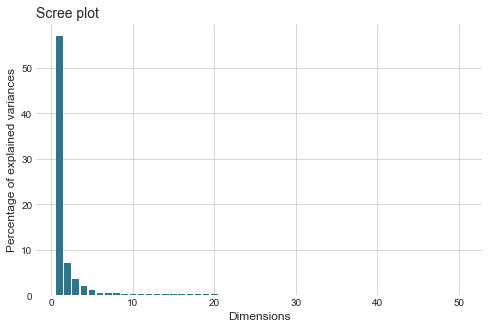

In [28]:
# Perform PCA

# Centrage et réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Recherche des composantes principales
pca = decomposition.PCA(n_components=50)
pca.fit(X_scaled)

# Projection des individus sur les axes factoriels
X_projected = pca.transform(X_scaled)

# GRAPHIQUES
plt.style.use('seaborn-whitegrid')
fontsize_axes = 12
fontsize_ticks = 10
fontsize_title = 14

def display_scree_plot(pca):
    plt.figure(figsize=(8,5))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, color="#34738C")

    # legends
    plt.xlabel("Dimensions", fontsize=fontsize_axes)
    plt.xticks(fontsize=fontsize_ticks)
    plt.ylabel("Percentage of explained variances", fontsize=fontsize_axes)
    plt.yticks(fontsize=fontsize_ticks)
    plt.title("Scree plot", fontsize=fontsize_title, loc='left')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.show()

display_scree_plot(pca)

In [29]:
X_projected.shape, y.shape

((44310, 50), (44310,))

In [8]:
from lazypredict.Supervised import LazyRegressor

X_projected = X_projected.astype(np.float32)
offset = int(X_projected.shape[0] * 0.7)

X_train, y_train = X_projected[:offset], y[:offset]
X_test, y_test = X_projected[offset:], y[offset:]

lazyreg = LazyRegressor(verbose = 0, ignore_warnings=True, custom_metric=None)
models, predictions = lazyreg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 43/43 [32:28<00:00, 45.32s/it]


In [9]:
models

,R-Squared,RMSE,Time Taken
Model,,,
KNeighborsRegressor,0.67,7838190.07,8.87
ExtraTreesRegressor,0.60,8575507.49,19.07
RandomForestRegressor,0.58,8775503.35,71.17
BaggingRegressor,0.52,9394197.17,6.80
XGBRegressor,0.50,9603741.54,7.61
LGBMRegressor,0.43,10217731.16,0.81
HistGradientBoostingRegressor,0.43,10250220.61,2.91
GradientBoostingRegressor,0.24,11845683.26,23.62
DecisionTreeRegressor,0.16,12457372.57,1.15


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [25]:
#create a KNN model
# for k in range(4,7):
#     knn_cv = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='manhattan') 
#     cv_scores = cross_val_score(knn_cv, X_projected, y, cv=10) 
#     print('k:{} - cv_scores mean:{}'.format(k, np.mean(cv_scores)))

k:4 - cv_scores mean:0.6991281849688852
k:5 - cv_scores mean:0.6907591948296793
k:6 - cv_scores mean:0.6986553630433442


## Model

In [45]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsRegressor(weights='distance', metric='manhattan')

param_grid = {'n_neighbors': np.arange(3,6)}

knn_gs = GridSearchCV(knn2, param_grid, cv=10, verbose=2)

knn_gs.fit(X_projected[:,:21], y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] n_neighbors=3 ...................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .................................... n_neighbors=3, total=   1.0s
[CV] n_neighbors=3 ...................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[CV] .................................... n_neighbors=3, total=   0.8s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.9s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.9s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.8s
[CV] n_neighbors=3 .................................................

GridSearchCV(cv=10,
             estimator=KNeighborsRegressor(metric='manhattan',
                                           weights='distance'),
             param_grid={'n_neighbors': array([3, 4, 5])}, verbose=2)

In [46]:
knn_gs.best_params_, knn_gs.best_score_

({'n_neighbors': 4}, 0.7059803845845742)

In [8]:
df_test = import_and_transform_data('Data/test/')
df_test

freq,index,0.0,0.01666638889351844,0.03333277778703688,0.049999166680555325,0.06666555557407376,0.0833319444675922,0.09999833336111065,0.1166647222546291,0.13333111114814752,...,39.86600223329611,39.88266862218963,39.899335011083146,39.91600139997667,39.932667788870184,39.9493341777637,39.96600056665722,39.98266695555074,39.99933334444426,segment_id
0,sensor_1,4.462476,0.038349,0.134076,0.085605,0.245776,0.098269,0.192568,0.238864,0.192877,...,0.688594,0.558362,1.511450,0.161551,0.883836,0.456171,1.257083,1.271266,1.716003,1000213997
1,sensor_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000213997
2,sensor_3,3.584690,0.337934,0.204221,1.720011,2.934069,5.632747,3.872341,4.541313,5.551674,...,2.351132,2.742011,2.160033,1.534057,1.410250,0.988140,2.451747,3.488232,1.732517,1000213997
3,sensor_4,3.677255,8.695886,4.579681,3.266593,1.906202,1.884186,1.488639,0.656050,1.159396,...,2.454365,1.704413,3.244520,1.400255,2.567716,1.714849,0.534553,2.577692,5.373750,1000213997
4,sensor_5,0.932501,0.038955,0.110079,0.175336,0.147437,0.268008,0.074318,0.066647,0.109220,...,1.705957,1.380029,1.131592,2.301202,1.044755,1.071660,1.663820,1.272762,0.711333,1000213997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45195,sensor_6,5.089865,2.154530,1.053143,1.804059,0.827806,1.566531,2.030801,1.556698,0.828912,...,3.114529,1.811340,2.455989,3.343100,3.347336,2.330346,1.499779,1.262957,2.470663,99975682
45196,sensor_7,5.543958,0.787115,0.923785,0.396569,0.752323,0.627240,0.767012,0.552977,1.096175,...,0.090702,0.065086,0.334062,0.277527,0.512979,0.452197,0.448010,0.368748,0.239064,99975682
45197,sensor_8,4.414276,5.429152,2.396537,1.115742,1.329648,1.521271,0.543693,0.800583,1.397448,...,0.442631,0.676793,0.538837,1.271817,0.667949,0.508405,1.146118,0.478269,1.394885,99975682
45198,sensor_9,1.950851,0.154554,0.258793,0.245011,0.128896,0.406095,0.309636,0.101926,0.249629,...,2.143589,0.314581,2.930488,2.194220,1.124387,3.089365,1.060063,2.261150,1.677183,99975682


In [32]:
X_test = df_test.iloc[:,1:-1]
X_test = pca.transform(X_test)

In [33]:
X_test.shape

(45200, 50)

In [34]:
y_pred = knn_gs.predict(X_test)

In [35]:
y_pred

array([ 1433878.5608572 , 31940416.92758515,  1985539.66199253, ...,
        1186179.26296911, 14291647.27919551, 31940416.92758515])

In [36]:
prediction = pd.DataFrame([df_test['segment_id'], y_pred]).transpose().astype(int)

In [37]:
prediction.columns = ['segment_id', 'time_to_eruption']

In [38]:
prediction = prediction.groupby('segment_id').mean().reset_index()

In [39]:
submission = pd.read_csv('Data/sample_submission.csv', sep=',', usecols=['segment_id'])

In [40]:
submission = submission.merge(prediction, on='segment_id')

In [41]:
submission['time_to_eruption'] = round(submission['time_to_eruption'],0).astype(int)

In [42]:
submission

,segment_id,time_to_eruption
0,1000213997,12354818
1,100023368,11691935
2,1000488999,22445447
3,1001028887,12941536
4,1001857862,11006499
...,...,...
4515,996704281,15636620
4516,997630809,20963438
4517,998072137,25888538
4518,998136924,8992448


In [43]:
submission.to_csv('Data/sample_submission01.csv', sep=',', index=False)